In [49]:
import datetime
import json
import re

def get_year_links():
    current_year = datetime.date.today().year
    year_links = []

    for year in range(2009, current_year + 1):
        link = f"http://thetartan.org/{year}"
        year_links.append(link)

    return year_links


import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def get_subpages():
    year_links = get_year_links()
    subpages = []

    for year_link in year_links:
        response = requests.get(year_link)
        soup = BeautifulSoup(response.content, "html.parser")
        for link in soup.find_all("a"):
            relative_url = link["href"]
            subpage_url = urljoin(year_link, relative_url)

            if subpage_url.endswith(".pdf"):
                continue

            if subpage_url.endswith("/") or len(subpage_url.split("/")) == 4:
                continue

            if len(subpage_url.split("/")) == 6:
                continue

            if "2" not in subpage_url:
                continue

            subpages.append(subpage_url)

    sorted_subpages = sorted(subpages, key=lambda x: x.split("/")[3:], reverse=True)
    return sorted_subpages


def extract_date_from_url(url):
    date_match = re.search(r"/(\d{4})/(\d{1,2})/(\d{1,2})/", url)
    if date_match:
        year = date_match.group(1)
        month = date_match.group(2).zfill(2)
        day = date_match.group(3).zfill(2)
        return f"{year}_{month}_{day}"
    return None


def get_article_links_and_dates():
    subpages = get_subpages()
    article_pages = {}

    for subpage in subpages:
        try:
            response = requests.get(subpage)
            soup = BeautifulSoup(response.content, "html.parser")
            for link in soup.find_all("a"):
                article_url = urljoin(subpage, link["href"])

                if not article_url.startswith("http://thetartan.org"):
                    continue

                if article_url.endswith(".pdf"):
                    continue

                if article_url.endswith(("news", "sports", "scitech", "pillbox", "forum", "comics")):
                    continue

                date = extract_date_from_url(article_url)
                if date:
                    if date not in article_pages:
                        article_pages[date] = []

                    if article_url not in article_pages[date]:
                        article_pages[date].append(article_url)
                        print(f"Added article: {article_url}")

        except Exception as e:
            print(f"Error accessing or parsing subpage: {subpage}")
            print(e)

    json_data = json.dumps(article_pages, indent=4)
    with open("cmu_article_pages.json", "w") as json_file:
        json_file.write(json_data)

In [50]:
get_article_links_and_dates()

Added article: http://thetartan.org/2023/5/1/sports/foul-play
Added article: http://thetartan.org/2023/5/1/sports/high-seas
Added article: http://thetartan.org/2023/5/1/sports/pickleball
Added article: http://thetartan.org/2023/5/1/sports/nhl
Added article: http://thetartan.org/2023/5/1/scitech/thecycle
Added article: http://thetartan.org/2023/5/1/scitech/irisrover
Added article: http://thetartan.org/2023/5/1/scitech/ghosting
Added article: http://thetartan.org/2023/5/1/pillbox/editorsletter
Added article: http://thetartan.org/2023/5/1/pillbox/othercmus
Added article: http://thetartan.org/2023/5/1/pillbox/canvas
Added article: http://thetartan.org/2023/5/1/pillbox/nineteendays
Added article: http://thetartan.org/2023/5/1/pillbox/trivia7
Added article: http://thetartan.org/2023/5/1/pillbox/otherside
Added article: http://thetartan.org/2023/5/1/pillbox/coffee
Added article: http://thetartan.org/2023/5/1/pillbox/velocipastor
Added article: http://thetartan.org/2023/5/1/pillbox/renfield
Ad

In [51]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os
import json 

# Open the JSON file
with open('cmu_article_pages.json', 'r') as f:
    all_links_dates = json.load(f)

school_name = "CMU"
dates = sorted(all_links_dates.keys())

for date in reversed(dates):
    articles = all_links_dates[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="CMU", publication_date=date, text=article_text)
        print(f"Date {date} added.")

Date 2023_05_01 added.
Date 2023_04_24 added.
Date 2023_04_17 added.
Date 2023_04_10 added.
Date 2023_04_03 added.
Date 2023_03_27 added.
Date 2023_03_20 added.
Date 2023_02_27 added.
Date 2023_02_20 added.
Date 2023_02_13 added.
Date 2023_02_06 added.
Date 2023_01_30 added.
Date 2022_12_05 added.
Date 2022_11_21 added.
Date 2022_11_14 added.
Date 2022_11_07 added.
Date 2022_10_31 added.
Date 2022_10_10 added.
Date 2022_10_03 added.
Date 2022_09_26 added.
Date 2022_09_19 added.
Date 2022_09_12 added.
Date 2022_04_25 added.
Date 2022_04_18 added.
Date 2022_04_11 added.
Date 2022_04_04 added.
Date 2022_03_28 added.
Date 2022_03_21 added.
Date 2022_02_28 added.
Date 2022_02_21 added.
Date 2022_02_14 added.
Date 2022_02_07 added.
Date 2022_01_30 added.
Date 2021_11_22 added.
Date 2021_11_15 added.
Date 2021_11_08 added.
Date 2021_11_01 added.
Date 2021_10_25 added.
Date 2021_10_11 added.
Date 2021_10_04 added.
Date 2021_09_27 added.
Date 2021_09_20 added.
Date 2021_05_12 added.
Date 2021_0

grouped_data/csv/CMU_Israel.csv created.
grouped_data/pkl/monthly/CMU_Israel.pkl being created.


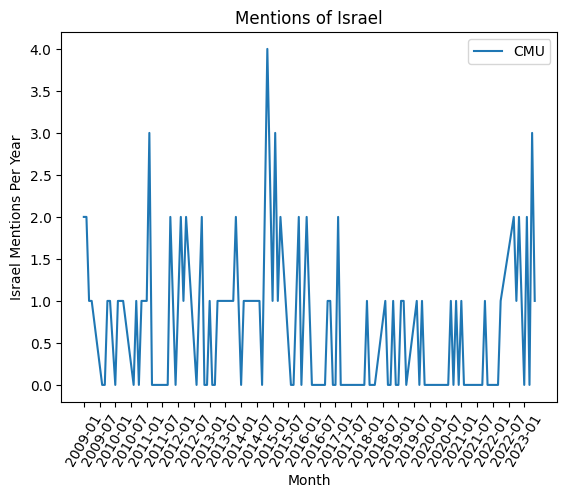

In [5]:

school_name = 'CMU'
string = "Israel"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")